<a href="https://colab.research.google.com/github/RomulusGwelt/ml-dm-kbtu/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, files
from oauth2client.client import GoogleCredentials

import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import pandas as pd 
from scipy.io import loadmat
import random
from tqdm import tqdm


In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/Colab Notebooks/Machine learning and data mining 2019/K-means/'

In [0]:
data=loadmat(path + 'ex7data1') 
x = np.array(data['X'])
k = 3
x.shape

(50, 2)

In [0]:
centroids = np.array(random.sample(list(x), k))
centroids

array([[3.47580524, 3.63284876],
       [3.22382902, 4.94255585],
       [3.95524687, 4.5053271 ]])

In [0]:
def distance(point, centroid):
  return np.sqrt(np.sum(np.square(centroid - point)))

In [0]:
def findClosestCentroids(data, centroids):
  res = np.zeros(len(data))
  for i in range(len(data)):
    distances = np.zeros(len(centroids))
    for j in range(len(centroids)):
      distances[j] = distance(data[i], centroids[j])
    res[i] = np.argmin(distances)
  return res.astype(int)

In [0]:
def computeMeans(x, idx, k):
  res = np.zeros((k, x.shape[1]))
  for i in range(k):
    res[i] = np.mean(x[idx.ravel() == i], axis=0)     
  return res  

In [0]:
def plotProgresskMeans(X, centroids, previous, idx, K):
    colors = [plt.cm.tab20(float(i) / 10) for i in idx]
    plt.scatter(X[:,0], X[:,1], c=colors, s=2)
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='k', s=100, linewidth=1)
    for j in range(K):
        plt.plot([centroids[j][0], previous[j][0]], [centroids[j][1], previous[j][1]], c='k')

100%|██████████| 100/100 [00:02<00:00, 36.50it/s]


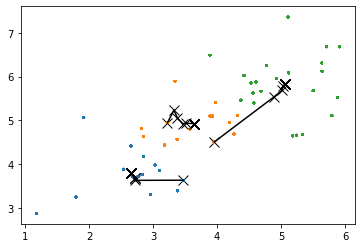

In [0]:
previous_centroids = centroids
for iterations in tqdm(range(100)):
  idx = findClosestCentroids(x, centroids)
  plotProgresskMeans(x, centroids, previous_centroids, idx, k)
  previous_centroids = centroids
  centroids = computeMeans(x, idx, k)    
plt.show()

In [0]:
mat = loadmat(path + 'bird_small')

In [0]:
A = mat['A']
A = A / 255.
size = A.shape
x = A.reshape(size[0] * size[1], 3)
k = 16
centroids = np.array(random.sample(list(x), k))



100%|██████████| 10/10 [00:41<00:00,  4.09s/it]


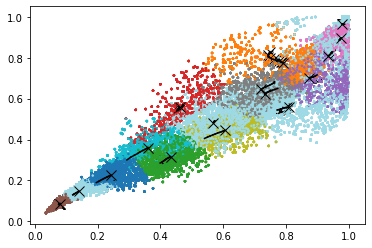

In [0]:
previous_centroids = centroids
for iterations in range(10):
  idx = findClosestCentroids(x, centroids)
  plotProgresskMeans(x, centroids, previous_centroids, idx, k)
  previous_centroids = centroids
  centroids = computeMeans(x, idx, k)    
plt.show()